In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # for downloading mnist dataset...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# This operation can take 1-2 minutes..
mnist = fetch_openml('mnist_784')


# In[2]:


mnist.data.shape


# ### Let's define a function to see the number images in the Mnist dataset:

# In[3]:


# Let it take the dataframe and index number of the dataframe as arguments.


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

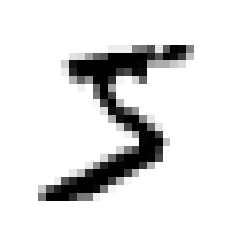

In [42]:
def showimage(dframe, index):    
    some_digit = dframe[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()


# In[4]:


# Sample usage:
showimage(mnist.data, 0)

In [18]:
mnist.data.shape

(70000, 784)

In [61]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [63]:
train_lbl

array(['7', '3', '0', ..., '7', '1', '1'], dtype=object)

In [64]:
scaler = StandardScaler()

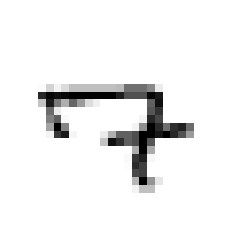

In [65]:
test_img_copy = test_img.copy()




showimage(test_img_copy, 4)

In [66]:
scaler.fit(train_img)

StandardScaler()

In [67]:
train_img = scaler.transform(train_img)

In [68]:
test_img = scaler.transform(test_img)

In [69]:
test_img


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
pca_model = PCA(.95)

In [71]:
pca_model.fit(train_img)

PCA(n_components=0.95)

In [72]:
print(pca_model.n_components_)

327


In [73]:
train_img = pca_model.transform(train_img)
test_img = pca_model.transform(test_img)

In [74]:
train_lbl

array(['7', '3', '0', ..., '7', '1', '1'], dtype=object)

In [75]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [76]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [77]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

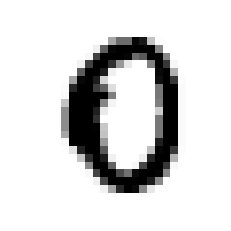

In [78]:
showimage(test_img_copy, 0)

In [82]:
test_img[0].reshape(1,-1).shape

(1, 327)

In [86]:
logisticRegr.predict(test_img[55].reshape(1,-1))

array(['0'], dtype=object)

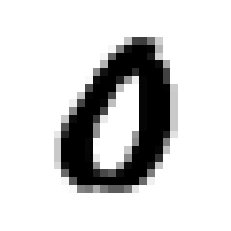

In [87]:
showimage(test_img_copy,55)

In [88]:
logisticRegr.score(test_img, test_lbl)

0.9184